### ADVANCED STATISTICS FOR PHYSICS ANALYSIS, Physics of Data
###  Student: Matteo Guida 
### ID Number: 1211201

# Sheet 8

## Exercise 1

In [1]:
library(rjags)
library(LaplacesDemon)
library(coda)
data<- NULL
data$D <- c ( 4 , 5 , 4 , 1 , 0 , 4 , 3 , 4 , 0 , 6 ,3 , 3 , 4 , 0 , 2 , 6 , 3 , 3 , 5 , 4 , 5 , 3 , 1 , 4 , 4 , 1 , 5 , 5 , 3 , 4 , 2 , 5 , 2 , 2 , 3 , 4 , 2 , 1 , 3 , 2 ,1 , 1 , 1 , 1 , 1 , 3 , 0 , 0 , 1 , 0 , 1 , 1 , 0 , 0 , 3 , 1 , 0 , 3 , 2 , 2 ,0 , 1 , 1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 0 , 2 , 1 , 0 , 0 , 0 , 1 , 1 , 0 , 2 ,2 , 3 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 2 , 4 , 2 , 0 , 0 , 0 , 1 , 4 , 0 , 0 , 0 ,1 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0 , 1 , 0 , 0 )
data$N <-112
years<-1851:1962.

Loading required package: coda
Linked to JAGS 4.3.0
Loaded modules: basemod,bugs


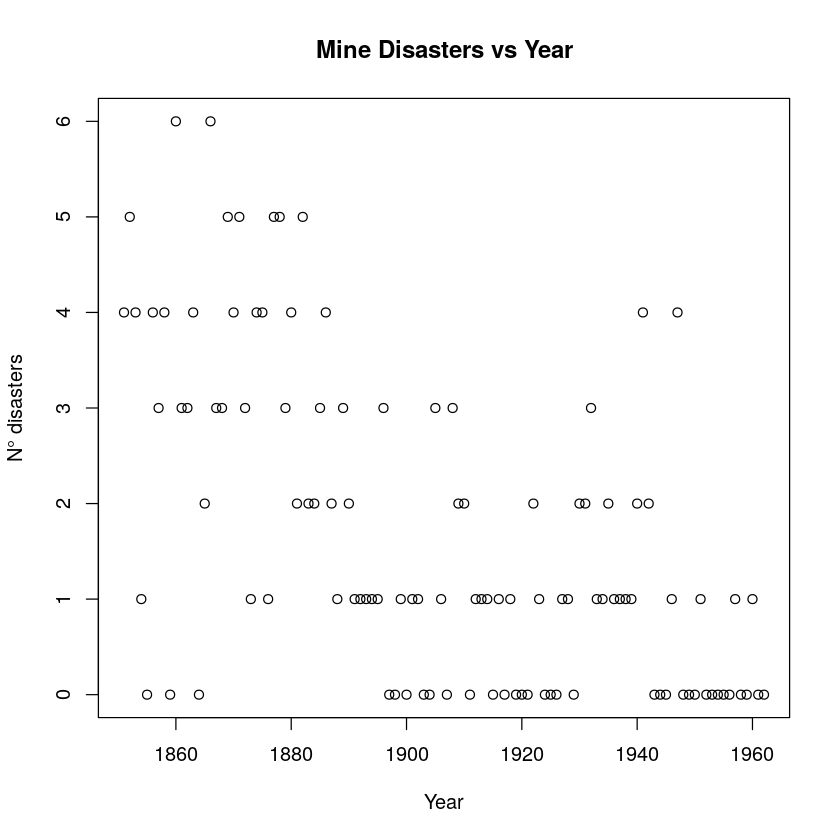

In [2]:
plot(years,data$D, main = 'Mine Disasters vs Year', xlab = 'Year', ylab = expression("N° disasters"))

In [3]:
# define the model using BUGS language
# x ∼ dpois(theta)
# p(x|θ) = θ^{x}/x! e^{−θ}
# x ∼ dnorm(mu,tau) tau=1/sigma^2

cat("model{
    # data likelihood
    for (t in 1:N){ 
    log(mu[t]) <- b0 + b1*step(t-tau)

    
    D[t] ~ dpois(mu[t])
    y[t] ~ dpois(mu[t])
    }

    b0~dunif(-3,3)
    b1~dunif(-3,3)
    tau~dunif(1,N) 
}", file="BUGS_model.bug")

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model



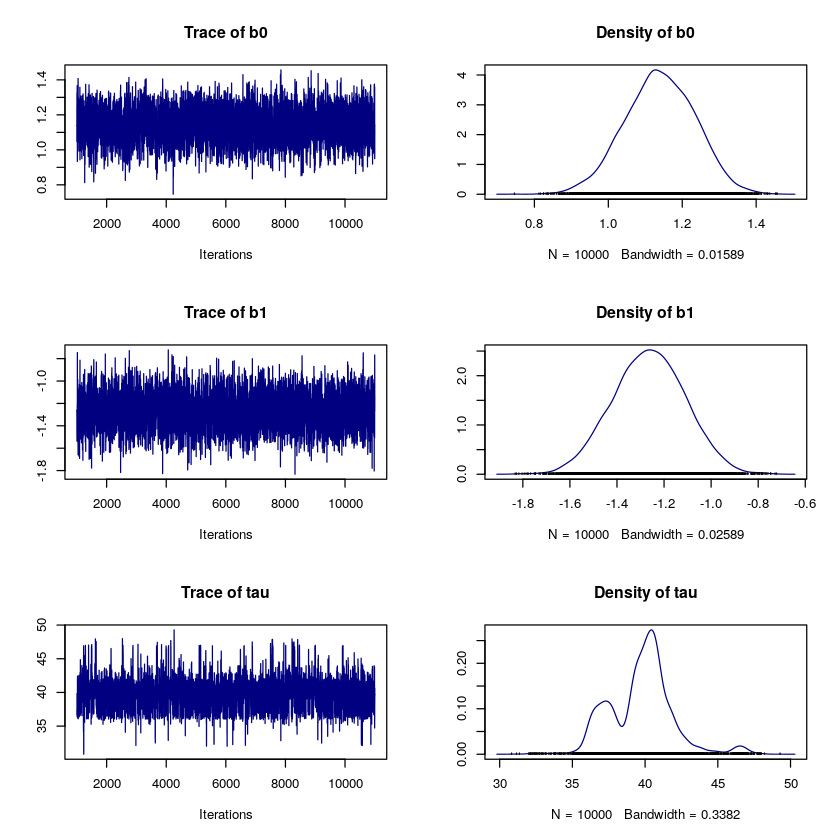

In [4]:
model<- "BUGS_model.bug"
inits <- NULL
inits$b0 <- 0
inits$b1 <- 0
inits$tau <- 50
jm <- jags.model(model ,data,inits)
chain0 <- coda.samples(jm , c("b0", "b1","tau"), n.iter=10000)
plot(chain0 , col="navy")

In [5]:
summary(chain0)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

      Mean      SD  Naive SE Time-series SE
b0   1.140 0.09461 0.0009461       0.001814
b1  -1.264 0.15411 0.0015411       0.002807
tau 39.761 2.20185 0.0220185       0.055319

2. Quantiles for each variable:

       2.5%    25%    50%    75%   97.5%
b0   0.9497  1.076  1.140  1.206  1.3195
b1  -1.5657 -1.368 -1.263 -1.159 -0.9649
tau 36.0822 38.158 39.993 40.856 45.5490


In [6]:
cat(sprintf("\n Correlation matrix: \n"))
chain0.df <- as.data.frame( as.mcmc(chain0) )
print(cor(chain0.df))


 Correlation matrix: 
            b0          b1         tau
b0   1.0000000 -0.57003013 -0.24972761
b1  -0.5700301  1.00000000 -0.02720885
tau -0.2497276 -0.02720885  1.00000000


## Effects of thinning

In [7]:
thinning<-c(2,3,5,7,10,50)

In [13]:
corner_text <- function(text, location="topright"){
legend(location,legend=text, bty ="n", pch=NA) 
})

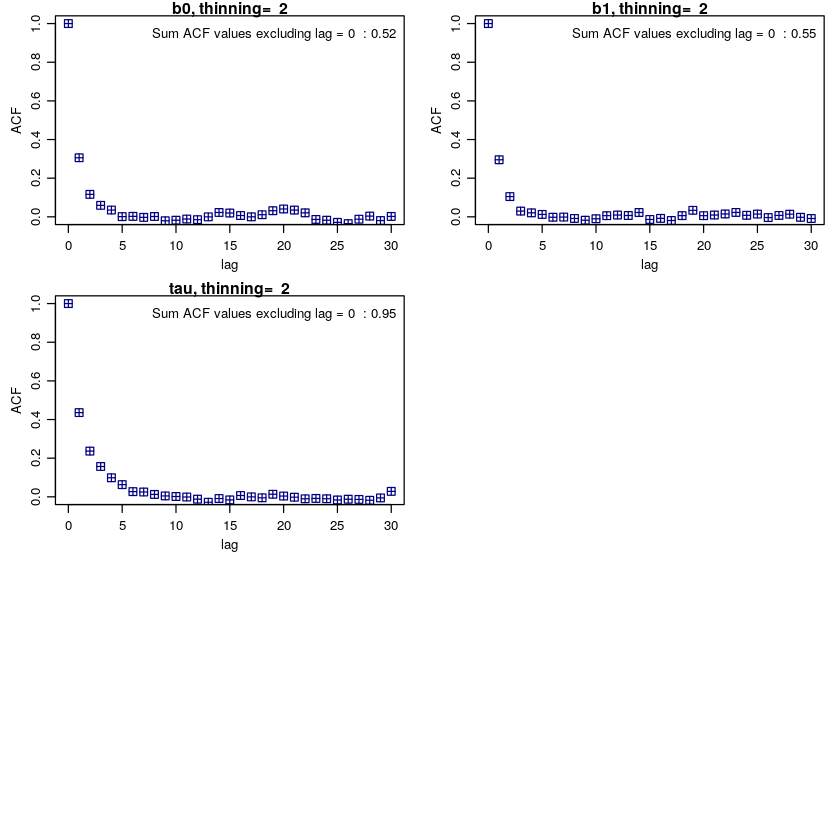

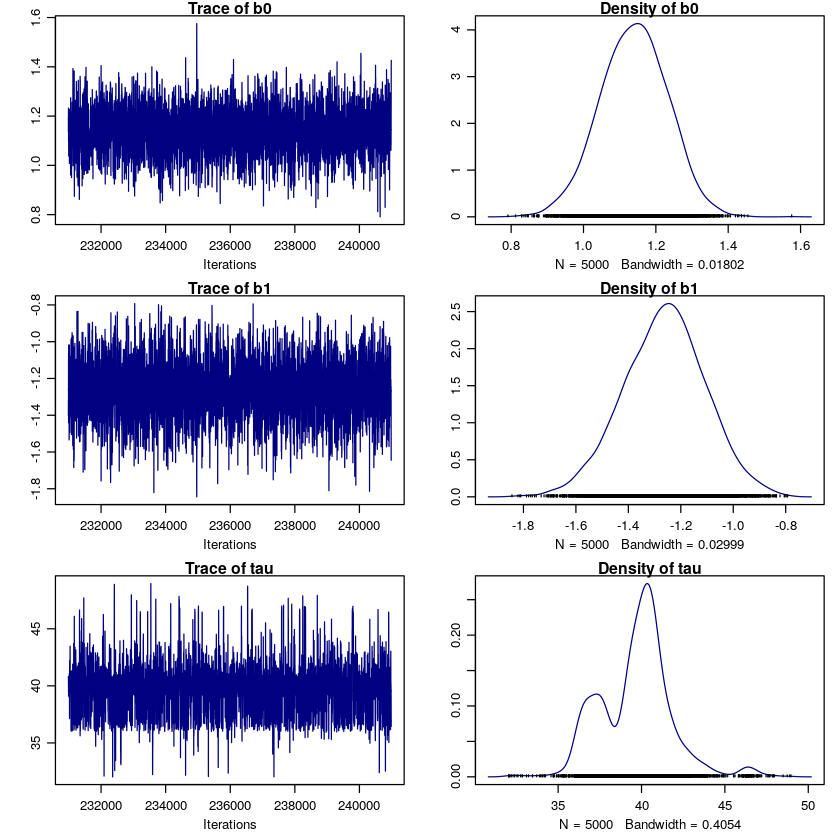

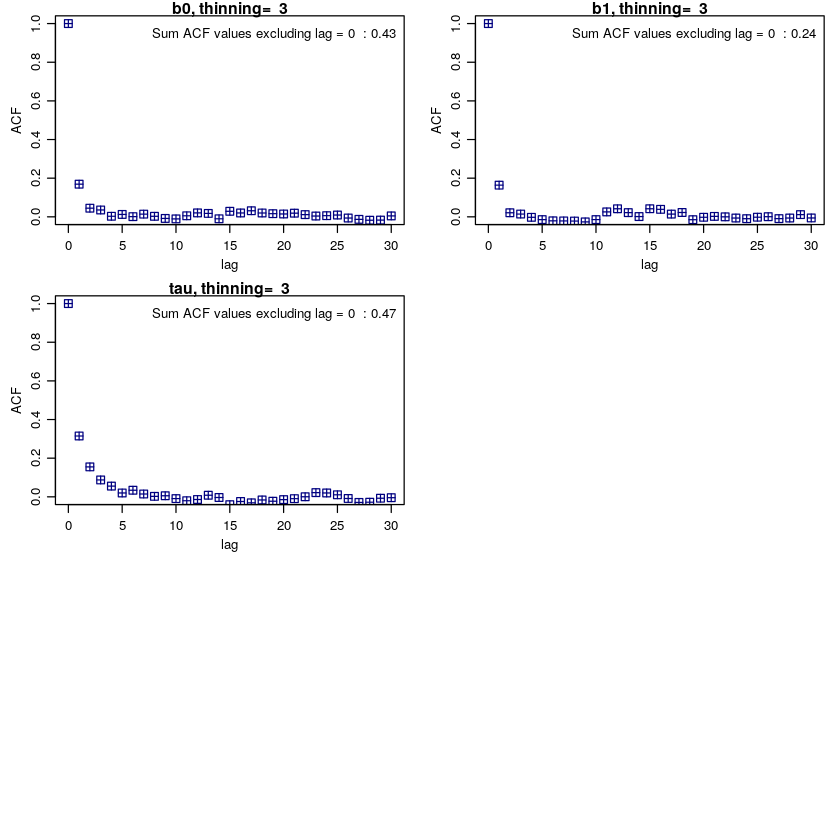

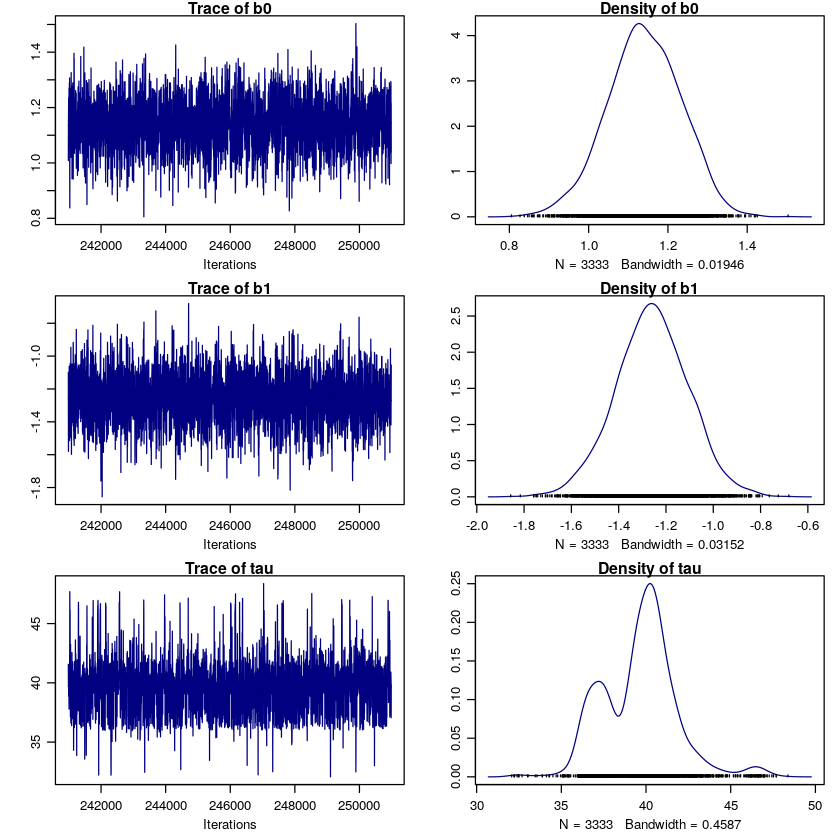

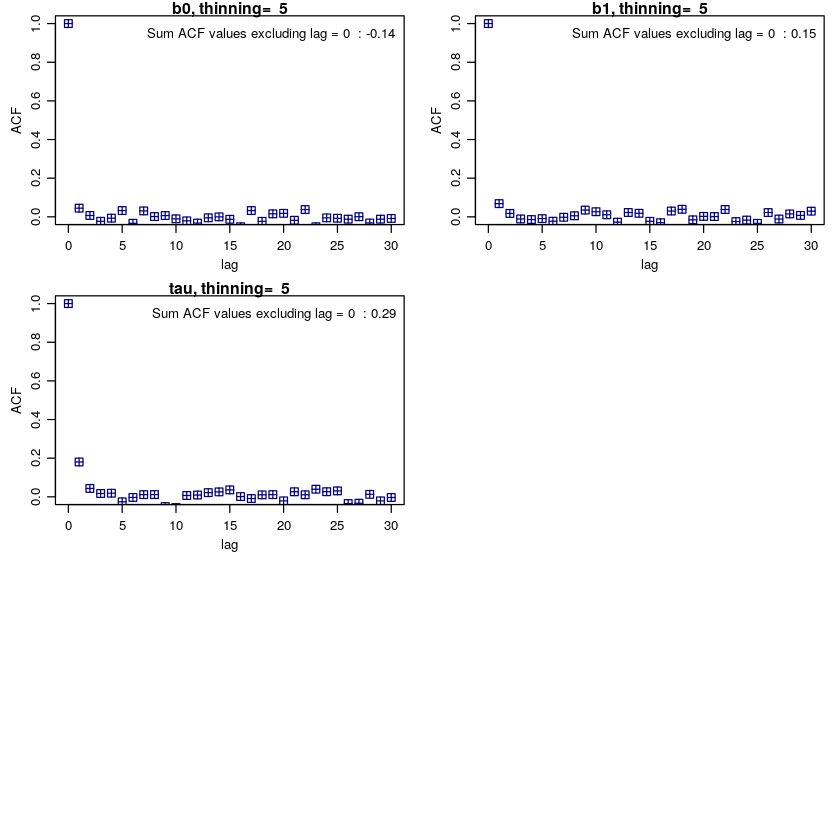

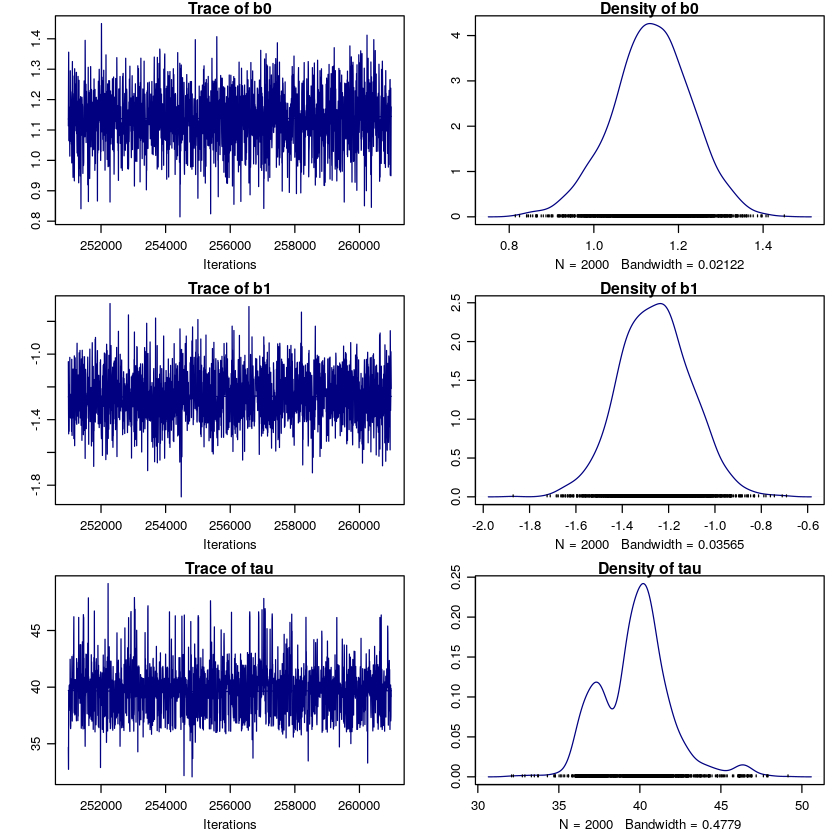

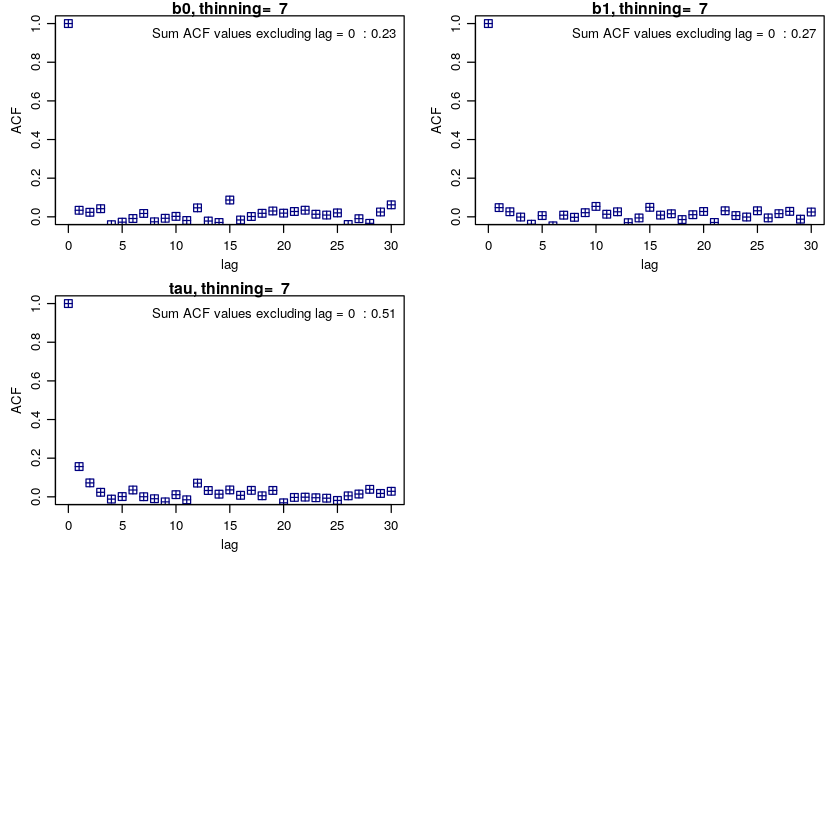

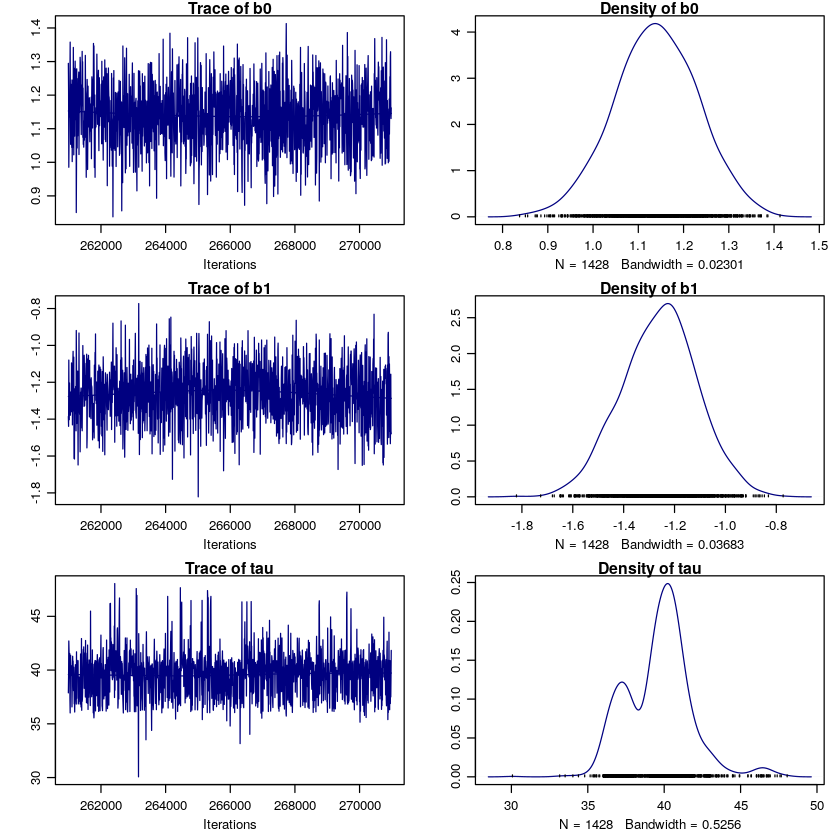

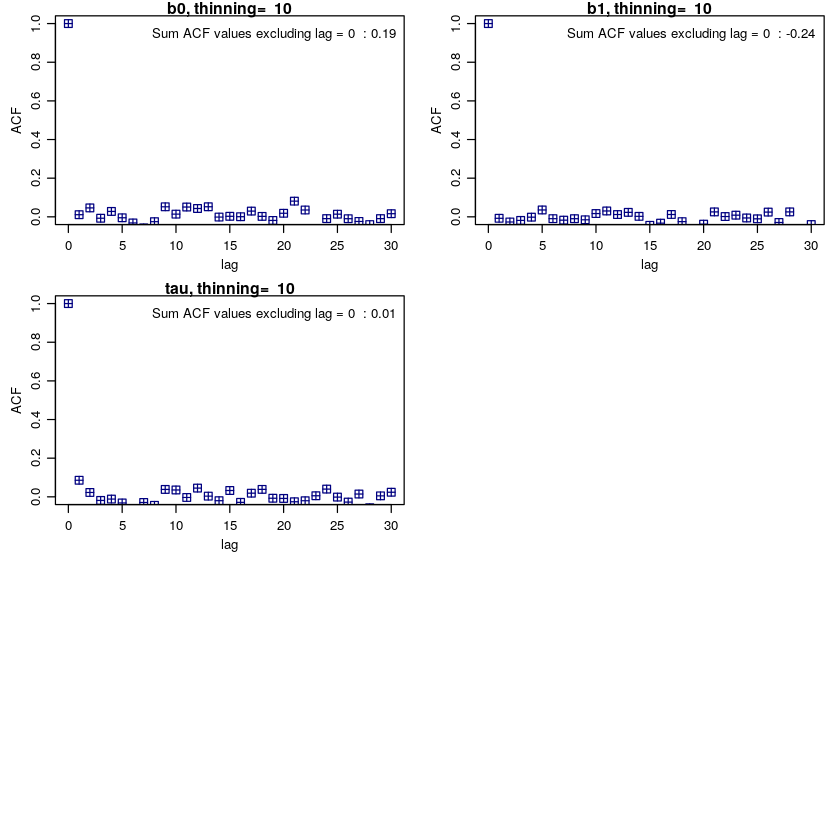

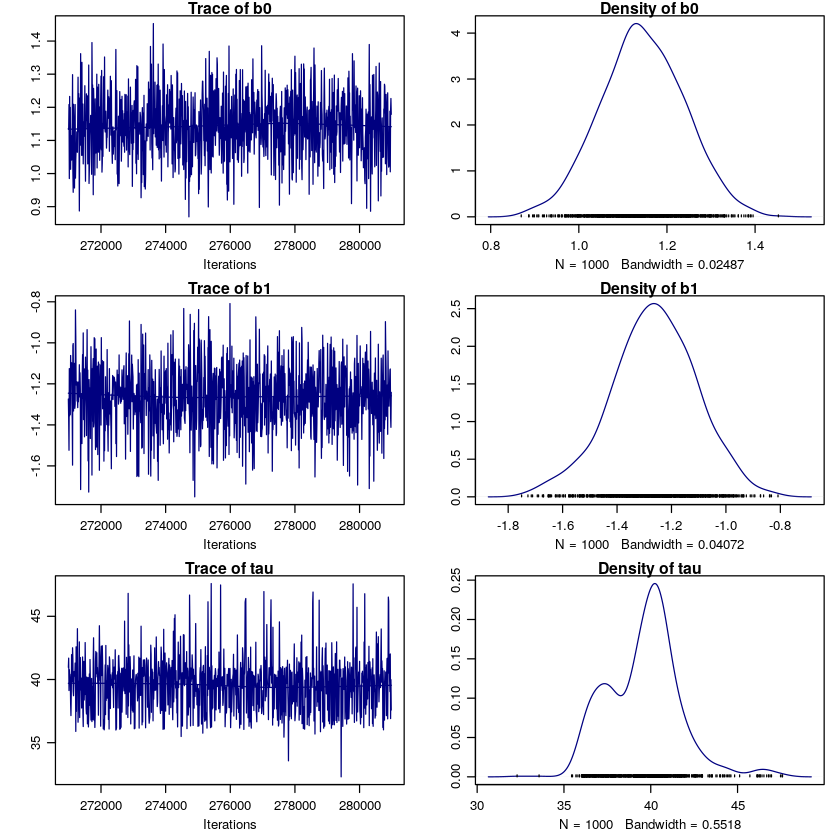

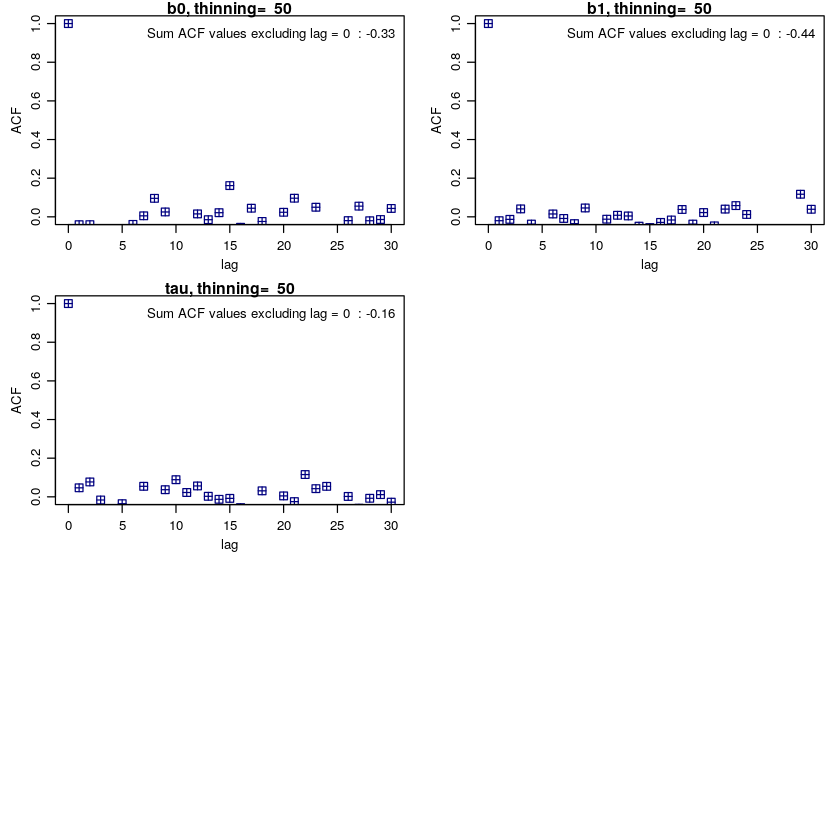

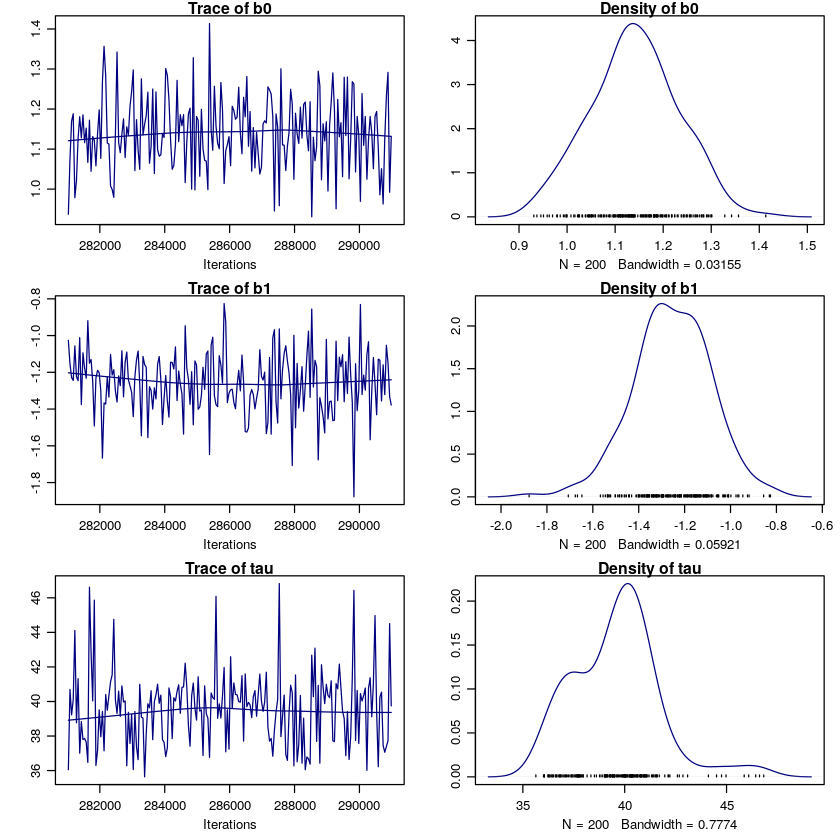

In [15]:
# Fixed burn-in, different values of thinning 
for(i in 1:length(thinning))
    {
    chain1 <- coda.samples(jm, c("b0", "b1","tau"),
    n.iter = 10000, thin = thinning[i])
    chain1.df <- as.data.frame( as.mcmc(chain1) )
    
    b0.chain<-as.mcmc(chain1.df["b0"])
    b1.chain<-as.mcmc(chain1.df["b1"])
    tau.chain<-as.mcmc(chain1.df["tau"])
    
    par(mfrow=c(3,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1))
    my.lags<-seq(0,30,1)
    y1.b0<-autocorr(b0.chain, lags=my.lags)
    plot(my.lags , y1.b0, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3,main=paste("b0, thinning= ",thinning[i]))
    corner_text(sprintf("Sum ACF values excluding lag = 0  : %.2f", sum(y1.b0[2:length(y1.b0)])))

    y1.b1<-autocorr(b1.chain, lags=my.lags)
    plot(my.lags , y1.b1, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3,main=paste("b1, thinning= ",thinning[i]))
    corner_text(sprintf("Sum ACF values excluding lag = 0  : %.2f", sum(y1.b1[2:length(y1.b1)])))

    y1.tau<-autocorr(tau.chain, lags=my.lags)
    plot(my.lags , y1.tau, ylim=c(0,1),
    pch=12, col="navy",
    xlab="lag", ylab="ACF", cex=1.3,main=paste("tau, thinning= ",thinning[i]))
    
    corner_text(sprintf("Sum ACF values excluding lag = 0  : %.2f", sum(y1.tau[2:length(y1.tau)])))
    plot(chain1 , col="navy")
}

## Comment: 
Usually growing a bit the thinning causes a faster decrease of the ACF.
For too large value (as thinning = 50) it seems that ACF(h) becomes less stable and it turns out a negative correlation. Negative correlations appear because too few sample remain and considering a couple of values with distance between them equal to the lag almost always one has a value under the mean. 

Moreover for too high values of thinning too few values remains in the chain and the trace, as you can see, becomes very unstable.

In our case the optimal choices seems to be thinning = 7 or 10.

## Effects of burn-in
With n.adapt = 0 we set the default bunr-in=1000 to zero. 

In [10]:
burn.in=c(1,500,1000,5000)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model

NOTE: Stopping adaptation




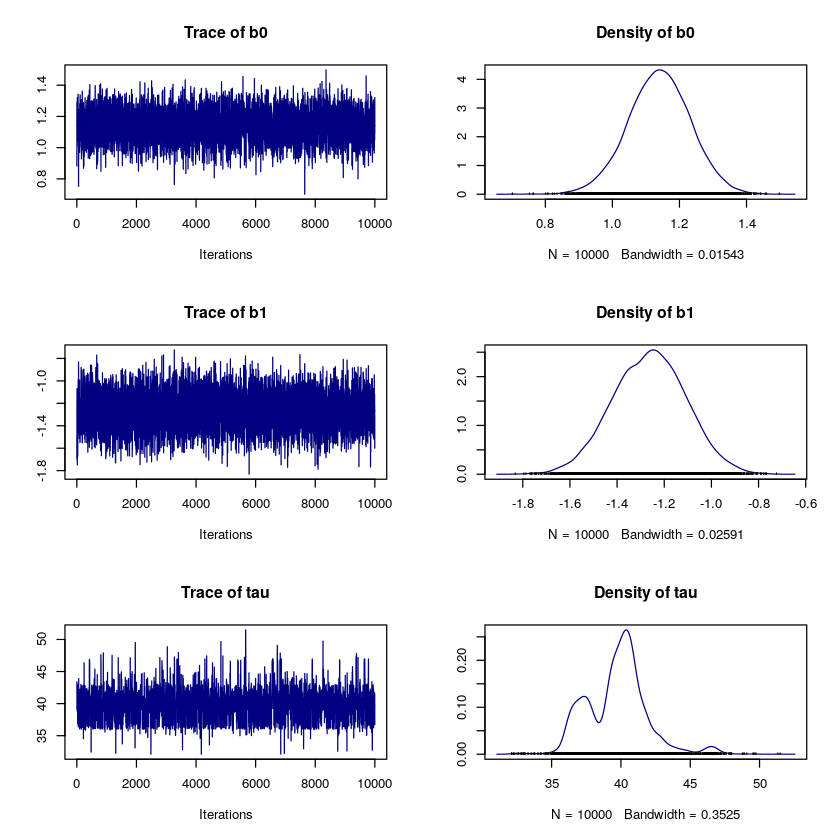

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model

NOTE: Stopping adaptation




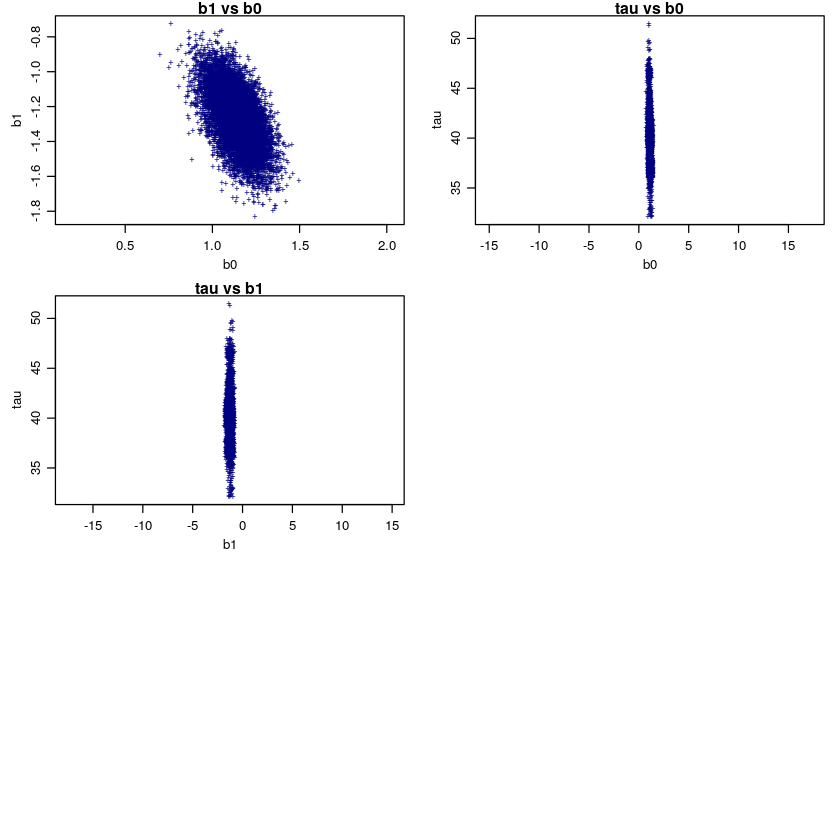

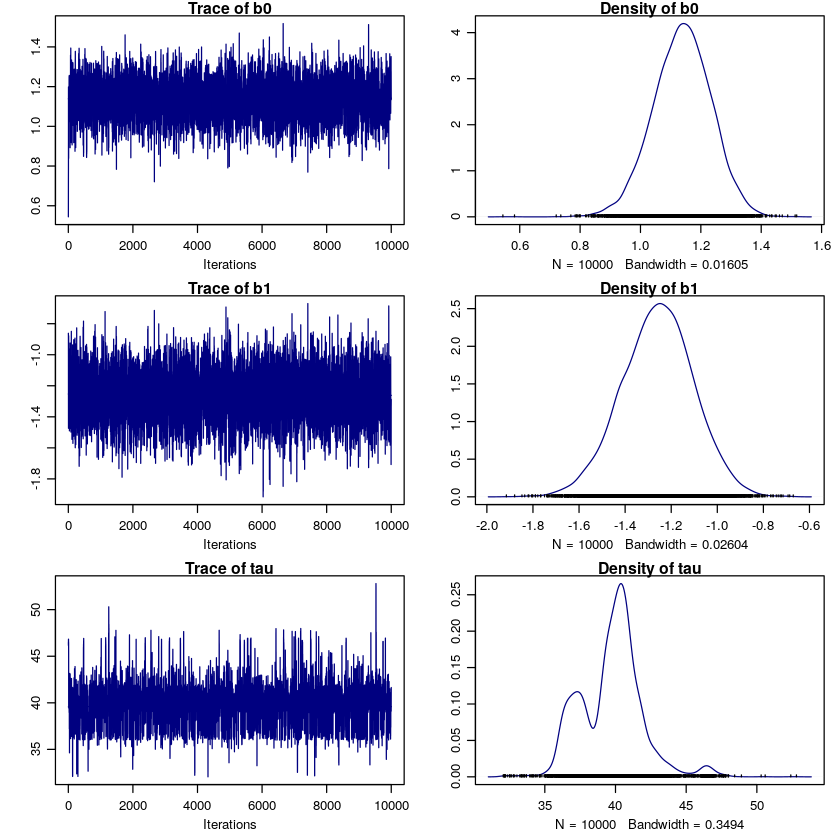

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model

NOTE: Stopping adaptation




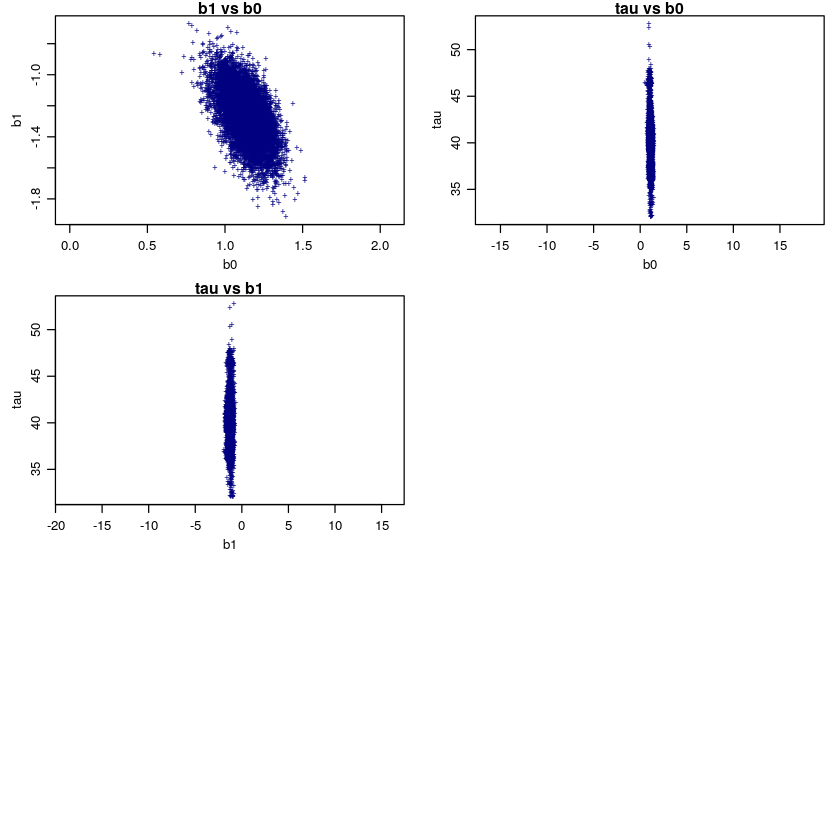

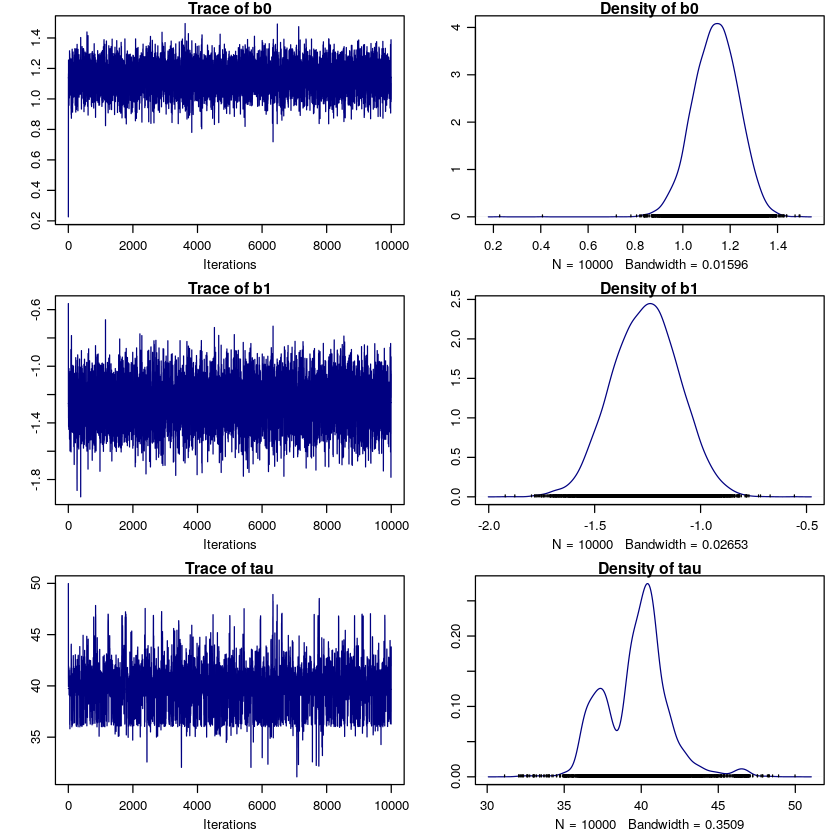

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 112
   Unobserved stochastic nodes: 115
   Total graph size: 901

Initializing model

NOTE: Stopping adaptation




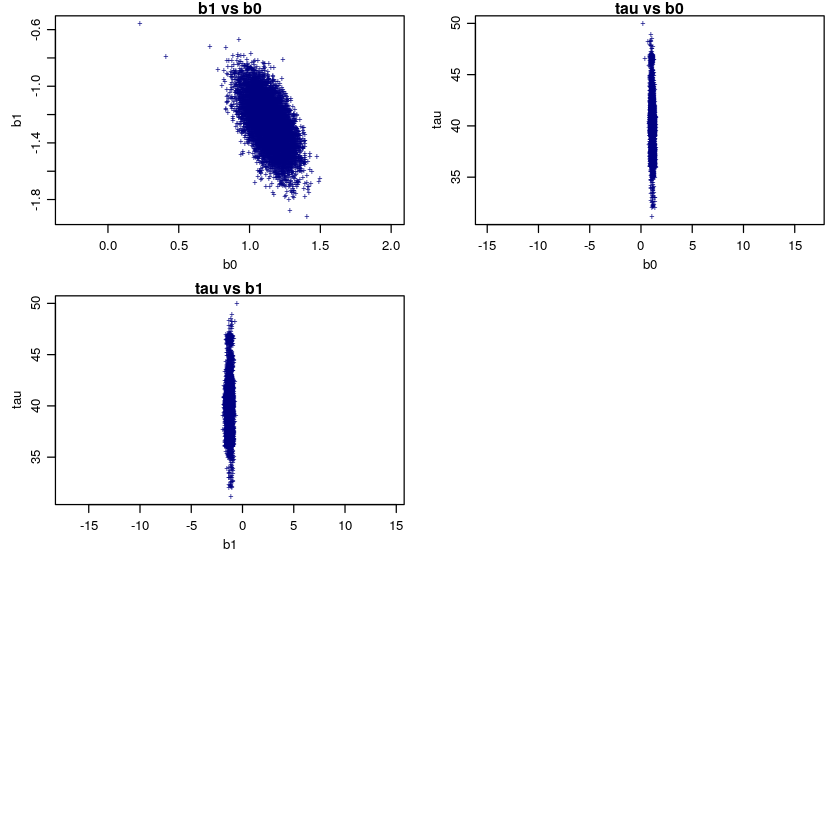

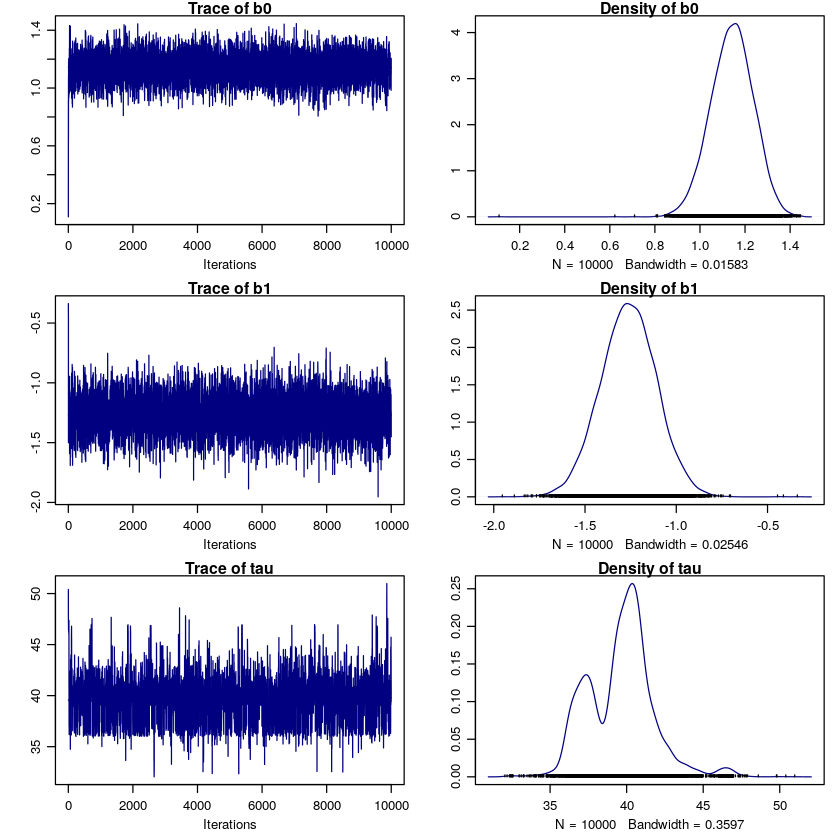

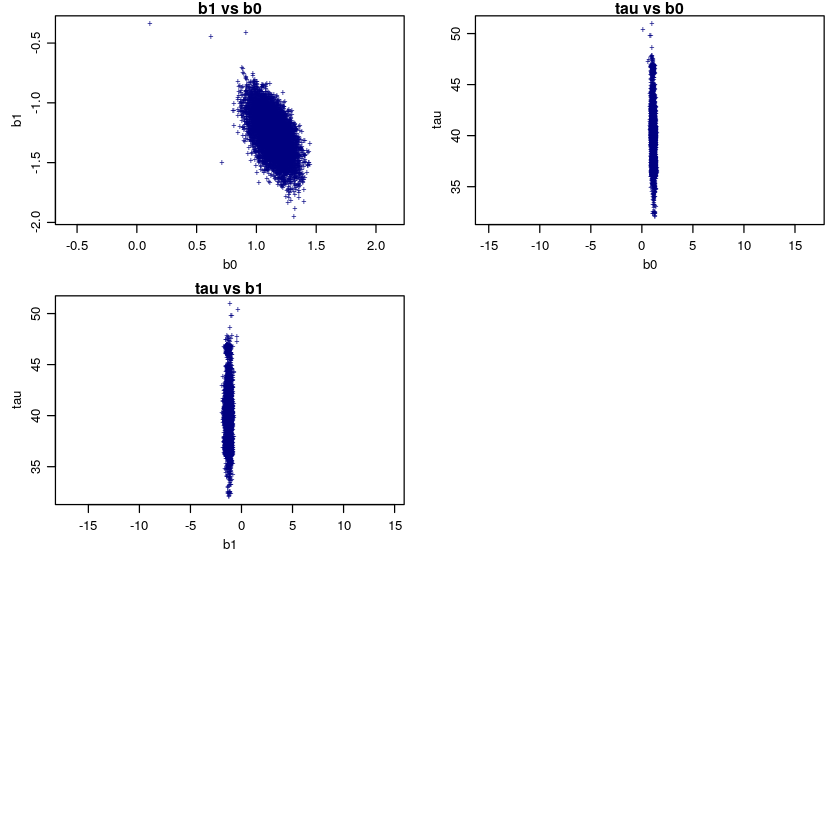

In [19]:
# Fixed thinning, different values of burn-in 
for(i in 1:length(burn.in))
    {
    jm <- jags.model(model ,data,inits,n.adapt = 0)
    chain2 <- coda.samples(jm, c("b0", "b1","tau"),
    n.iter = 10000)
    plot(chain2 , col="navy")
    chain1.df <- as.data.frame( as.mcmc(chain2) )

    par(mfrow=c(3,2), mgp=c(2.0,0.8,0), mar=c(3.5,3.5,1,1))
    plot(chain1.df$b0 , chain1.df$b1, xlab="b0", ylab="b1", main="b1 vs b0",
    pch="+", col="navy", cex=0.75, asp=1)
    
    plot(chain1.df$b0 , chain1.df$tau, xlab="b0", ylab="tau", main="tau vs b0",
    pch="+", col="navy", cex=0.75, asp=1)
    
    plot(chain1.df$b1 , chain1.df$tau, xlab="b1", ylab="tau", main="tau vs b1",
    pch="+", col="navy", cex=0.75, asp=1)
}

### Comment:
It is a good practice not to initialize the parameters to values too close to those of convergence to see if the algorithm converges the same to those values. Even changing the burn-in values we see that the result does not change and already from the very first values of the chain they converge to the final value.